## Importing CNN from In-class assignment and testing on MNIST Dataset

In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import mnist


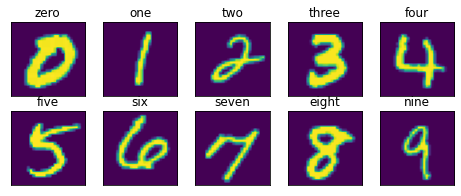

Epoch 1/5
469/469 [==============================] - 485s 1s/step - loss: 0.8089 - accuracy: 0.9449 - val_loss: 0.0526 - val_accuracy: 0.9838
Epoch 2/5
469/469 [==============================] - 487s 1s/step - loss: 0.0235 - accuracy: 0.9929 - val_loss: 0.0469 - val_accuracy: 0.9842
Epoch 3/5
469/469 [==============================] - 486s 1s/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.0523 - val_accuracy: 0.9846
Epoch 4/5
469/469 [==============================] - 487s 1s/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0549 - val_accuracy: 0.9859
Epoch 5/5
313/313 [==============================] - 15s 49ms/step - loss: 0.0576 - accuracy: 0.9857
Loss: 0.058
Accuracy: 0.986


In [27]:
np.random.seed(42)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
class_names = ['zero','one','two','three','four',
               'five','six','seven','eight', 'nine']
fig = plt.figure(figsize=(8,3))
for i in range(len(class_names)):
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
  idx = np.where(Y_train[:]==i)[0]
  features_idx = X_train[idx,::]
  img_num = np.random.randint(features_idx.shape[0])
  im = features_idx[img_num,::]
  ax.set_title(class_names[i])
  #im = np.transpose(features_idx[img_num,::], (1, 2, 0))
  plt.imshow(im)
plt.show()
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
# Initializing the model
model = Sequential()
# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# We add our classificator
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])
# Training of the model
model.fit(X_train, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=5,
          validation_data=(X_test, to_categorical(Y_test)))
# Evaluation of the model
scores = model.evaluate(X_test, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

I can see that the accuracy with the existing CNN is pretty accurate. I can also see that the accuracy is pretty high at above 98%. This shows that the existing CNN model that we have from our in class assignment is good with this dataset.

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [37]:

latent_dim = 32
height = 32
width = 32
channels = 3
generator_input = keras.Input(shape=(latent_dim,))
x = layers.Dense(128 * 16 * 16)(generator_input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((16, 16, 128))(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)
generator = keras.models.Model(generator_input, x)
generator.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 32)]              0         
                                                                 
 dense_11 (Dense)            (None, 32768)             1081344   
                                                                 
 leaky_re_lu_47 (LeakyReLU)  (None, 32768)             0         
                                                                 
 reshape_3 (Reshape)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_44 (Conv2D)          (None, 16, 16, 256)       819456    
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 32, 32, 256)      104

In [38]:
from tensorflow.keras import optimizers
discriminator_input = layers.Input(shape=(height, width, channels))
x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(1, activation='sigmoid')(x)
discriminator = keras.models.Model(discriminator_input, x)
discriminator.summary()
discriminator_optimizer = optimizers.RMSprop(
 learning_rate=0.0008,
 clipvalue=1.0,
 decay=1e-8)
discriminator.compile(optimizer=discriminator_optimizer,
loss='binary_crossentropy')

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 leaky_re_lu_52 (LeakyReLU)  (None, 30, 30, 128)       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 14, 14, 128)       262272    
                                                                 
 leaky_re_lu_53 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 6, 6, 128)         262272    
                                                                 
 leaky_re_lu_54 (LeakyReLU)  (None, 6, 6, 128)         0  

In [39]:
discriminator.trainable = False
gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)
gan_optimizer = optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')

In [43]:
#X_train = X_train[Y_train.flatten() == 6]
#X_train = X_train.reshape(
#(Y_train.shape[0],) +
#(height, width, channels)).astype('float32') / 255.
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
iterations = 10000
batch_size = 20
save_dir = 'your_dir'
start = 0
for step in range(iterations):
    random_latent_vectors = np.random.normal(size=(batch_size,
    latent_dim))
    generated_images = generator.predict(random_latent_vectors)
    stop = start + batch_size
    real_images = X_train[start: stop]
    combined_images = np.concatenate([generated_images, real_images])
    labels = np.concatenate([np.ones((batch_size, 1)),
    np.zeros((batch_size, 1))])
    labels += 0.05 * np.random.random(labels.shape)
    d_loss = discriminator.train_on_batch(combined_images, labels)
    random_latent_vectors = np.random.normal(size=(batch_size,
    latent_dim))
    misleading_targets = np.zeros((batch_size, 1))
    a_loss = gan.train_on_batch(random_latent_vectors,
    misleading_targets)
    start += batch_size
    if start > len(x_train) - batch_size:
        start = 0
    if step % 100 == 0:
        #gan.save_weights('gan.h5')
        print('discriminator loss:', d_loss)
        print('adversarial loss:', a_loss)
        img = image.array_to_img(generated_images[0] * 255., scale=False)
        img.save(os.path.join(save_dir,
         'generated_frog' + str(step) + '.png'))
        img = image.array_to_img(real_images[0] * 255., scale=False)
        img.save(os.path.join(save_dir,
         'real_frog' + str(step) + '.png'))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 5 dimension(s)